In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor


In [2]:
trip_advisor = pd.read_csv('tripadvisor_review.csv')
trip_advisor = trip_advisor.drop(['User ID'], axis=1)
trip_advisor_scaled = StandardScaler().fit_transform(trip_advisor)
trip_advisor

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


# Problem 1a

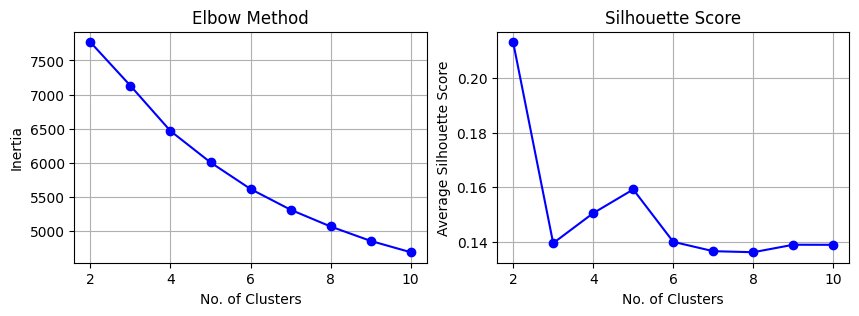

(2, 0.21315362778467906)

In [3]:
inertia_values = []
silhouette_avgs = []

k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(trip_advisor_scaled)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(trip_advisor_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

best_k = k_range[np.argmax(silhouette_avgs)]
best_k, max(silhouette_avgs)

Looking at the Silhouette score, the best K is k=2.

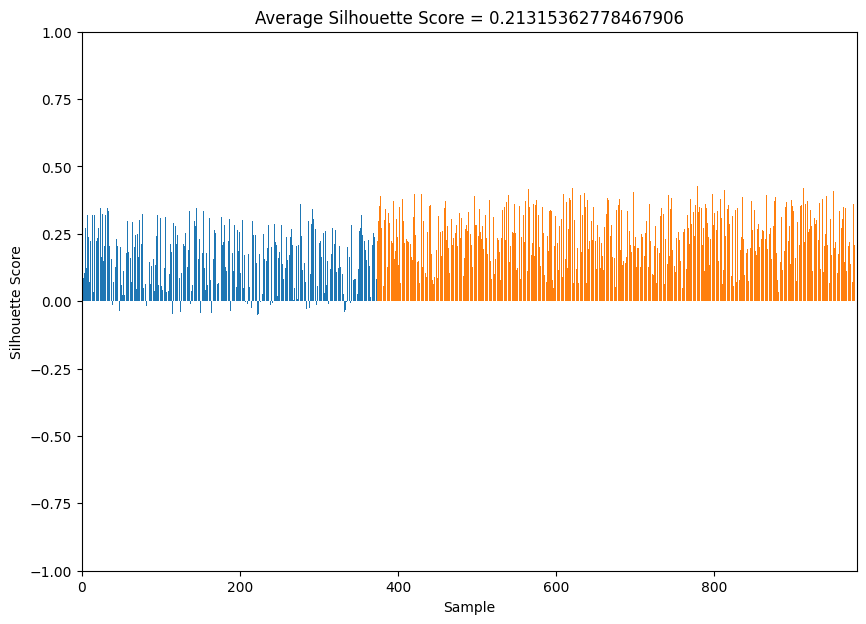

In [4]:
kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(trip_advisor_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(trip_advisor_scaled, cluster_labels)
silhouette_avg = silhouette_score(trip_advisor_scaled, cluster_labels)

plt.figure(figsize=(10, 7))

sample = 0
for i in range(0, best_k):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample, sample + sil.size), sil)
    sample += sil.size

plt.xlim([0, len(trip_advisor_scaled)])
plt.ylim([-1, 1])

plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Average Silhouette Score = {silhouette_avg}")

plt.show()

# Problem 1b

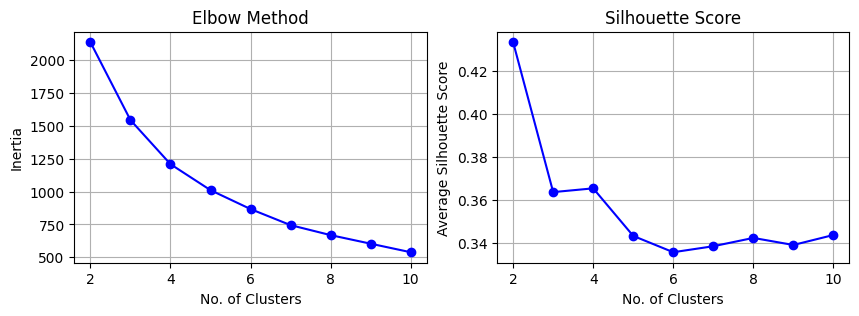

(2, 0.43332490833308157)

In [5]:
trip_advisor_scaled_pca = PCA(n_components=2).fit_transform(trip_advisor_scaled)

inertia_values = []
silhouette_avgs = []

k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(trip_advisor_scaled_pca)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(trip_advisor_scaled_pca, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

best_k = k_range[np.argmax(silhouette_avgs)]
best_k, max(silhouette_avgs)


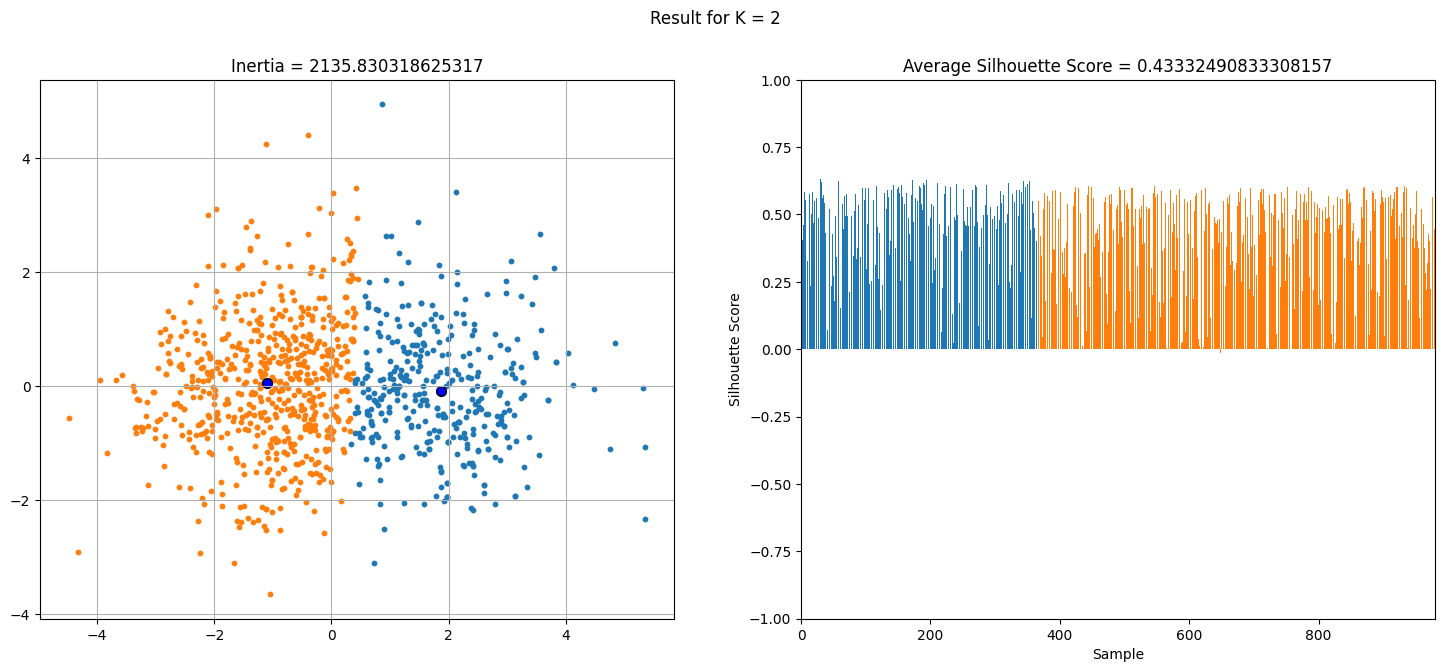

In [6]:
kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(trip_advisor_scaled_pca)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(trip_advisor_scaled_pca, cluster_labels)
silhouette_avg = silhouette_score(trip_advisor_scaled_pca, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {best_k}")
for i in range(0,best_k):
    ax1.scatter(trip_advisor_scaled_pca[cluster_labels == i,0], trip_advisor_scaled_pca[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,best_k):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, len(trip_advisor_scaled_pca), -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

# Problem 1c

Threshold (KDE) = 0.007945590602990158


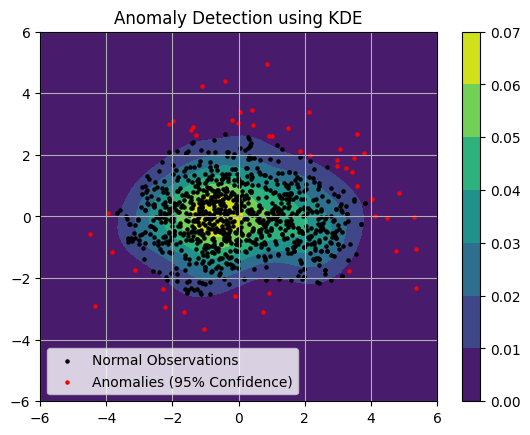

In [7]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-6,6),np.linspace(-6,6))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.6).fit(trip_advisor_scaled_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(trip_advisor_scaled_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = trip_advisor_scaled_pca[scores > threshold,:]
anomals = trip_advisor_scaled_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

Using the K-means clustering and looking at the silhouette score and the elbow method, the optimal number of user groups based on their rating patterns is two.

This means that users can be categorized, albeit broadly, into two clusters with similar rating behaviors.

Anomaly detection using Kernel Density Estimation has shown users with rating patterns that deviate significantly, indicated by the red dots in the scatter plot above. 

# Problem 2a

In [37]:
waste_df = pd.read_csv('water-treatment.data', header=None, na_values='?')
waste_df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [38]:
waste_df = waste_df.drop(0, axis=1)
waste_df = waste_df.dropna(axis=0)
waste_df


,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
3,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
8,29156.0,2.50,7.7,206.0,451.0,194.0,69.1,4.5,1249,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246.0,2.00,7.8,172.0,506.0,200.0,69.0,5.0,1865,7.8,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
10,42393.0,0.70,7.9,189.0,478.0,230.0,67.0,5.5,1410,8.1,...,1575.0,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
14,40923.0,3.50,7.6,146.0,329.0,188.0,57.4,2.5,1300,7.6,...,1545.0,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,32363.0,0.10,7.6,159.0,310.0,146.0,68.5,1.6,1096,7.6,...,1083.0,25.2,61.4,91.2,78.6,65.1,86.8,81.0,89.0,99.4
517,31437.0,0.47,7.6,132.0,304.0,148.0,64.9,2.0,939,7.7,...,1012.0,45.6,60.3,94.4,82.5,72.9,89.4,86.2,91.2,99.5
519,28088.0,0.20,7.5,153.0,307.0,124.0,82.3,2.5,1044,7.6,...,1038.0,40.5,54.4,94.0,89.7,75.5,93.5,85.0,90.3,100.0
520,27838.0,0.13,7.6,179.0,265.0,128.0,71.9,1.8,992,7.6,...,1044.0,13.7,45.0,95.0,87.5,71.3,93.9,79.6,89.1,100.0


In [39]:
waste_df_scaled = StandardScaler().fit_transform(waste_df)
waste_df_scaled = pd.DataFrame(waste_df_scaled)
waste_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.343241,0.525785,0.316286,0.250780,1.563544,-0.295154,0.375011,-0.063976,2.446198,-0.228257,...,0.934093,-0.404249,0.409678,0.522684,0.461196,0.347498,0.123414,0.481703,-0.002122,0.207914
1,-1.200658,0.095778,-0.530113,0.267095,0.399567,-0.278193,0.651826,-0.063976,-0.558227,-0.675358,...,-0.373975,0.467799,-1.182418,0.208128,0.215681,-0.995183,0.490805,-0.552668,0.096613,0.062502
2,0.273919,-0.119225,-0.106914,-0.287618,0.866857,-0.227313,0.643917,0.108197,1.008857,-0.228257,...,0.350413,-1.202508,0.061890,0.017147,0.620058,-0.242901,-0.097020,-1.136784,-0.512251,0.110972
3,0.733829,-0.678234,0.316286,-0.010261,0.628963,0.027092,0.485737,0.280369,-0.148648,1.113046,...,0.243579,-2.584369,-1.012388,0.151957,-10.471443,-4.090017,-12.845477,-5.152580,-7.670518,-15.205776
4,0.519000,0.525785,-0.953312,-0.711810,-0.636968,-0.329074,-0.273526,-0.752666,-0.428484,-1.122459,...,0.165408,-0.431081,-1.978466,-0.072726,-0.217581,-0.699984,-0.464411,-0.844726,-1.878081,0.014031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-0.731979,-0.936238,-0.953312,-0.499714,-0.798395,-0.685240,0.604372,-1.062576,-0.947454,-1.122459,...,-1.038431,-0.934186,0.193277,0.062084,-0.795263,-0.338126,-0.501150,0.323505,-0.100857,0.062502
376,-0.867307,-0.777136,-0.953312,-0.940221,-0.849372,-0.668280,0.319648,-0.924838,-1.346856,-0.675358,...,-1.223437,0.434259,0.108262,0.421577,-0.232023,0.404634,-0.023542,0.956297,0.261171,0.086737
377,-1.356738,-0.893238,-1.376511,-0.597604,-0.823884,-0.871804,1.695813,-0.752666,-1.079740,-1.122459,...,-1.155688,0.092148,-0.347727,0.376640,0.807805,0.652221,0.729609,0.810268,0.113069,0.207914
378,-1.393274,-0.923338,-0.953312,-0.173412,-1.180723,-0.837883,0.873278,-0.993707,-1.212026,-1.122459,...,-1.140054,-1.705613,-1.074217,0.488982,0.490080,0.252273,0.803087,0.153138,-0.084401,0.207914


In [40]:
print(waste_df_scaled.max(axis=0))

0      3.318797
1      7.233895
2      2.855482
3      4.052195
4      4.562696
5      8.490276
6      1.893538
7     10.782893
8      4.481372
9      2.901450
10     3.332265
11     9.750031
12     2.659568
13    11.442301
14     4.233797
15     2.383433
16     2.752428
17     2.681566
18     6.411890
19     2.627666
20     8.170439
21     5.522953
22     2.476815
23    13.889519
24     6.599546
25     9.546672
26     2.202000
27    17.312502
28     6.432146
29     2.681460
30     2.766907
31     1.050689
32     1.529908
33     2.680527
34     1.372543
35     2.404418
36     1.478899
37     0.207914
dtype: float64


In [41]:
dbscan = DBSCAN(eps=5, min_samples=20)
clusters = dbscan.fit_predict(waste_df_scaled)
# clusters = dbscan.fit_predict(waste_df)

outlier_mask = clusters == -1
outliers = waste_df_scaled[outlier_mask]
# outliers = waste_df[outlier_mask]

print("Number of Outliers Found:", len(outliers))
print("Outliers:\n", outliers)


Number of Outliers Found: 70
Outliers:
            0         1         2         3         4         5         6   \
3    0.733829 -0.678234  0.316286 -0.010261  0.628963  0.027092  0.485737   
9    0.708108  2.675821 -1.376511 -0.842331 -0.602983  0.111893 -0.463342   
17   0.174834 -0.678234  1.585884  0.707602  0.866857 -0.193392  0.462010   
42   0.456889  3.320831  1.162684  0.201835  0.611971  0.620702 -0.914155   
47   0.299494 -0.549232  0.316286 -0.010261  0.450544  6.590724 -2.796495   
..        ...       ...       ...       ...       ...       ...       ...   
303 -0.409005 -0.673934 -0.530113 -0.548659 -1.087265 -0.685240  0.817915   
324 -0.235534 -0.218127 -0.953312 -1.217578 -0.925838 -0.379955 -0.732248   
329 -0.736218  7.233895 -0.953312 -0.173412  0.484528  0.603742 -0.407979   
370 -2.900149 -0.742735 -1.376511 -0.646550 -1.979365 -0.464757 -1.871143   
374 -1.379390 -0.893238 -0.953312 -0.516029 -0.246143 -0.413876 -0.012530   

           7         8         9   

In [31]:
waste_df_scaled_pca = PCA(n_components=2).fit_transform(waste_df_scaled)
# waste_df_scaled_pca = pd.DataFrame(waste_df_scaled_pca)
waste_df_scaled_pca

array([[-3.68665686e+00, -9.63684711e-01],
       [ 1.68490010e-01,  9.49213957e-01],
       [-3.09507531e+00,  1.06573515e+00],
       [-7.34132542e+00,  2.96355072e+01],
       [ 1.10196991e+00,  3.21601475e+00],
       [-3.15658570e-01,  2.84450996e+00],
       [ 7.14726631e-01, -2.11396819e+00],
       [-2.57545697e+00,  4.97870477e+00],
       [-3.22284176e-01,  1.07295719e+00],
       [ 2.71384365e+00,  9.82229893e-01],
       [-6.40339354e-01,  4.19464362e-01],
       [-5.70692688e-01, -1.37221794e+00],
       [-3.77048283e-02, -1.32337465e-01],
       [-2.34079701e+00, -1.20361055e+00],
       [-1.04172307e+00, -4.60067611e-01],
       [ 7.18991209e-01,  2.21266491e+00],
       [ 1.05701101e+00,  1.56668246e+00],
       [-3.79389871e+00,  3.92621270e+00],
       [-1.44180570e+00,  2.26292404e+00],
       [-8.54345415e-01,  2.04228046e+00],
       [-1.78457078e+00,  1.57085778e+00],
       [-4.33519611e-01,  1.66911480e+00],
       [-2.02416143e+00,  1.50933737e+00],
       [-1.

Threshold (KDE) = 0.002268562861665983


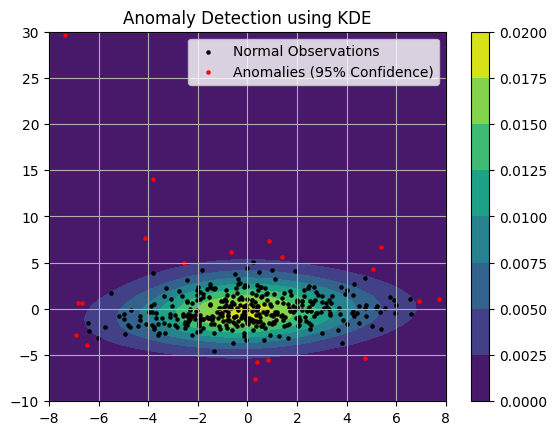

In [32]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-8,8),np.linspace(-10,30))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=2).fit(waste_df_scaled_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(waste_df_scaled_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = waste_df_scaled_pca[scores > threshold,:]
anomals = waste_df_scaled_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

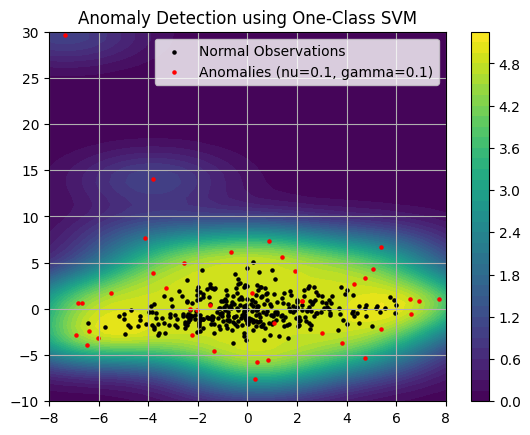

In [33]:
nu = 0.1
gamma = 0.1

ocsvm = OneClassSVM(nu=nu, gamma=gamma).fit(waste_df_scaled_pca)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(waste_df_scaled_pca)
normals = waste_df_scaled_pca[y_pred == 1,:]
anomals = waste_df_scaled_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label=f'Anomalies (nu={nu}, gamma={gamma})')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

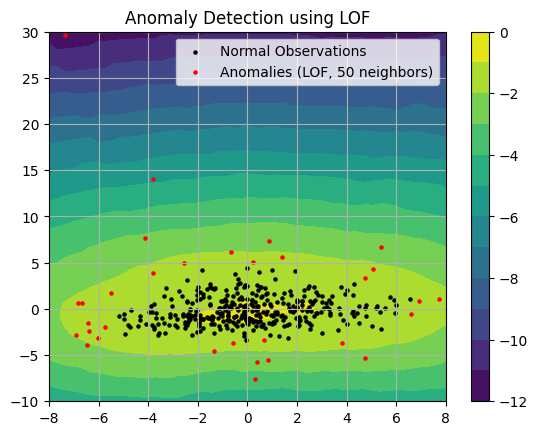

In [34]:
n_neighbors = 50

lof = LocalOutlierFactor(n_neighbors=n_neighbors,novelty=True).fit(waste_df_scaled_pca)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(waste_df_scaled_pca)
normals = waste_df_scaled_pca[y_pred == 1,:]
anomals = waste_df_scaled_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label=f'Anomalies (LOF, {n_neighbors} neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

Comparing the performance of the three methods, it is evident that the parameters play a crucial role in the performance of the anomaly detection method.

Using KDE resulted in the lowest number of anomalies. The One-Class SVM has anomalies within the dataset itself, indicating that the parameters need more tuning.
The Local Outlier Factor has also a respectable result visually.

However, again, the performance of each method require careful tuning for them to be effective in this scenario. And each of them can be used provided tuning has been done.

Using a simple DBSCAN, the outlier days are 70. This does not include the days where there are missing values as these days have been dropped in the processing.